In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [6]:
imbalance = tickbars.tick_rule(data_indexed['price'])

In [7]:
volume = data_indexed['volume']
volume_imbalance = imbalance*data_indexed['volume']

In [8]:
ties = tickbars.DollarVolumeImbalanceEvents(imbalance, volume, 100000, volume_imbalance.mean().item(), 2*1e-5)

In [9]:
tick_imb_tevents = ties.get_events()

In [10]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
3967,4260.875658,2013-09-01 17:40:57.851
44206,12192.598554,2013-09-02 07:20:28.795
312199,19692.597500,2013-09-03 10:27:34.424
785185,40453.519834,2013-09-04 10:07:32.380
987400,27899.924349,2013-09-04 16:13:11.260
1560948,34350.315498,2013-09-06 09:03:38.955
1697837,35786.552350,2013-09-06 10:00:20.287
1921445,30166.241661,2013-09-06 14:55:42.542
2206831,27752.425512,2013-09-09 13:15:20.944


In [11]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

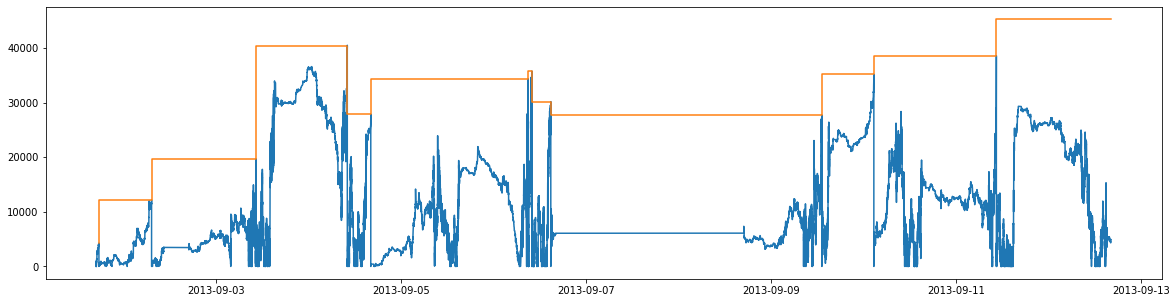

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
# plt.plot(tick_imb_tevents['time'], tick_imb_tevents['threshold'], 'o')
plt.show()

In [62]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [63]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-01 17:40:57.118,1640.25,1642.00,1639.00,1641.25,17139,1640.489060,2457.035,3967
1,2013-09-02 07:20:28.795,1641.25,1648.50,1639.75,1648.00,126113,1644.646692,49170.944,40239
2,2013-09-03 10:27:34.424,1648.00,1650.00,1639.50,1639.50,969967,1646.023678,97625.629,267993
3,2013-09-04 10:07:32.380,1639.50,1649.50,1630.75,1649.50,1873755,1638.376174,85197.956,472986
4,2013-09-04 16:13:11.260,1649.50,1655.00,1648.00,1655.00,910691,1651.829596,21938.880,202215
5,2013-09-06 09:03:38.955,1655.00,1663.50,1641.00,1641.00,2157914,1653.739086,147027.695,573548
6,2013-09-06 10:00:20.287,1641.00,1657.75,1638.75,1657.75,517385,1648.553165,3401.332,136889
7,2013-09-06 14:55:42.370,1657.75,1664.00,1654.25,1654.75,933314,1659.157617,17722.083,223608
8,2013-09-09 13:15:20.944,1654.75,1669.75,1652.00,1669.50,1151253,1661.482163,253178.402,285386
9,2013-09-10 02:45:11.779,1669.50,1675.00,1668.25,1675.00,492477,1670.440618,48590.835,106533


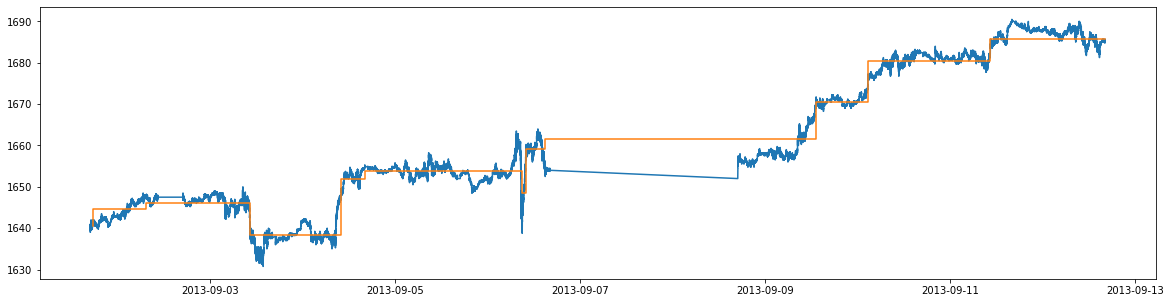

In [64]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()